In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statistics import mean
from scipy import signal
from scipy import stats
import pywt
import heartpy as hp

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

In [12]:
# Read data of hbO and hbR 

data = pd.read_excel('data.xlsx')

channel1_hbo = data.iloc[:,0]
channel1_hbr = data.iloc[:,1]
channel2_hbo = data.iloc[:,2]
channel2_hbr = data.iloc[:,3]
channel3_hbo = data.iloc[:,4]
channel3_hbr = data.iloc[:,5]
channel4_hbo = data.iloc[:,6]
channel4_hbr = data.iloc[:,7]


In [13]:
# Band-pass filter

bandpass_filter = [0.02, 0.1]
frequency = 10

channel1_hbo = hp.filter_signal(channel1_hbo, cutoff = bandpass_filter, sample_rate = frequency, order = 3, filtertype='bandpass')
channel1_hbr = hp.filter_signal(channel1_hbr, cutoff = bandpass_filter, sample_rate = frequency, order = 3, filtertype='bandpass')
channel2_hbo = hp.filter_signal(channel2_hbo, cutoff = bandpass_filter, sample_rate = frequency, order = 3, filtertype='bandpass')
channel2_hbr = hp.filter_signal(channel2_hbr, cutoff = bandpass_filter, sample_rate = frequency, order = 3, filtertype='bandpass')
channel3_hbo = hp.filter_signal(channel3_hbo, cutoff = bandpass_filter, sample_rate = frequency, order = 3, filtertype='bandpass')
channel3_hbr = hp.filter_signal(channel3_hbr, cutoff = bandpass_filter, sample_rate = frequency, order = 3, filtertype='bandpass')
channel4_hbo = hp.filter_signal(channel4_hbo, cutoff = bandpass_filter, sample_rate = frequency, order = 3, filtertype='bandpass')
channel4_hbr = hp.filter_signal(channel4_hbr, cutoff = bandpass_filter, sample_rate = frequency, order = 3, filtertype='bandpass')

In [4]:
# Average Channel-wise

average_hbo = [None] * len(data)
average_hbr = [None] * len(data)


for i in range(0,len(data)):

    hbo_input = [channel1_hbo[i], channel2_hbo[i], channel3_hbo[i], channel4_hbo[i]]
    hbr_input = [channel1_hbr[i], channel2_hbr[i], channel3_hbr[i], channel4_hbr[i]]
    
    average_hbo[i] = mean(hbo_input)
    average_hbr[i] = mean(hbr_input)


<function matplotlib.pyplot.show(close=None, block=None)>

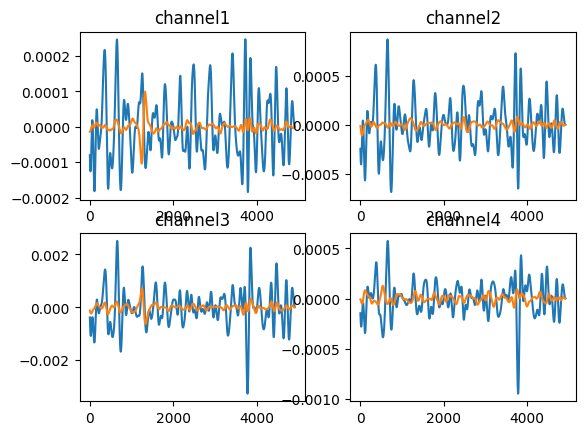

In [14]:
# Raw fNIRS Data

plt.subplot(2,2,1)
plt.plot(channel1_hbo)
plt.plot(channel1_hbr)
plt.title('channel1')

plt.subplot(2,2,2)
plt.plot(channel2_hbo)
plt.plot(channel2_hbr)
plt.title('channel2')

plt.subplot(2,2,3)
plt.plot(channel3_hbo)
plt.plot(channel3_hbr)
plt.title('channel3')

plt.subplot(2,2,4)
plt.plot(channel4_hbo)
plt.plot(channel4_hbr)
plt.title('channel4')

plt.show

In [7]:
# Correlation between hbO and hbR

print("channel 1: ", data.iloc[:,0].corr(data.iloc[:,1]))
print("channel 2: ", data.iloc[:,2].corr(data.iloc[:,3]))
print("channel 3: ", data.iloc[:,4].corr(data.iloc[:,5]))
print("channel 4: ", data.iloc[:,6].corr(data.iloc[:,7]))

channel 1:  -0.0011039401137538788
channel 2:  -0.5158347597153431
channel 3:  0.30123118360324985
channel 4:  -0.6462750034794535


See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('hbO', 'hbR')


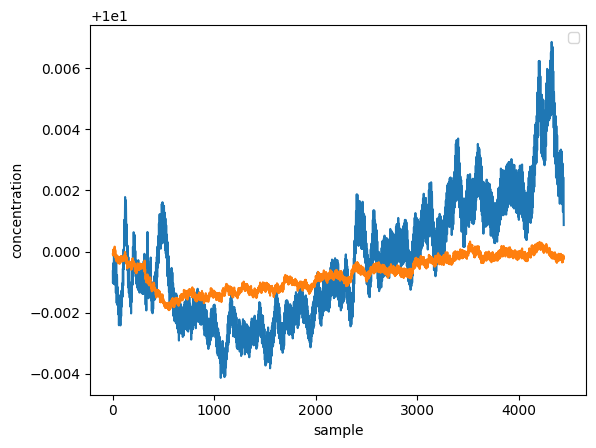

In [104]:
# Plot Average Channel-wise

plt.plot(average_hbo)
plt.plot(average_hbr)
plt.xlabel('sample')
plt.ylabel('concentration')
plt.legend('hbO', 'hbR')

In [105]:
# Feature Extraction
# Signal Mean in window of 7s
# Signal Peak in window of 7s
# Number of Local Max in window of 7s
# Slope in window of 7s


time_window = 70
window_count = int((len(average_hbo))/time_window)

hbo = [0] * len(average_hbo)
mean_hbo = [0] * window_count
peak_hbo = [0] * window_count
num_peak_hbo = [0] * window_count
slope_hbo = [0] * window_count

hbr = [0] *  len(average_hbr)
mean_hbr = [0] * window_count
peak_hbr = [0] * window_count
num_peak_hbr = [0] * window_count
slope_hbr = [0] * window_count


      hbO Mean   hbR Mean   hbO Peak   hbR Peak  hbO Peak Count  \
0     9.999292   9.999961   9.999623  10.000066               1   
1     9.999614  10.000072   9.999949  10.000163               2   
2     9.999424   9.999942   9.999922  10.000052               1   
3     9.999000   9.999768   9.999613   9.999863               1   
4     9.998792   9.999816   9.999233   9.999878               1   
..         ...        ...        ...        ...             ...   
439  10.002597   9.999855  10.003036   9.999931               1   
440  10.002464   9.999793  10.003294   9.999879               1   
441  10.002545   9.999818  10.003338   9.999928               1   
442  10.002547   9.999783  10.003278   9.999888               1   
443  10.002007   9.999767  10.002582   9.999870               1   

     hbR Peak Count  hbO Slope     hbR Slope  
0                 1   0.000040  1.572319e-05  
1                 3  -0.000021 -6.203489e-06  
2                 1  -0.000090 -2.613032e-05  
3      

Text(0.5, 0, 'slope')

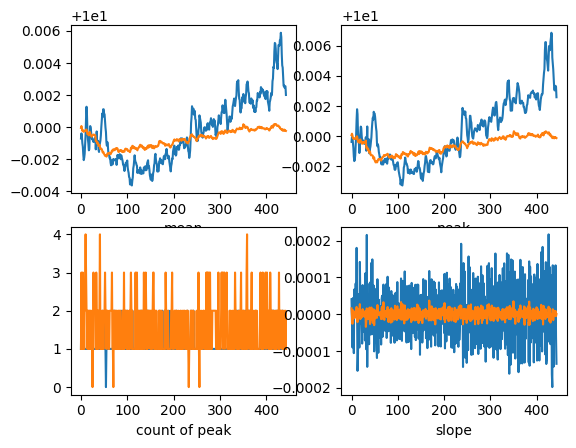

In [106]:
# Feature Extraction


for j in range(0, window_count):
    hbo = average_hbo[time_window*j:time_window*(j+1)]
    mean_hbo[j] = mean(hbo)
    peak_hbo[j] = max(hbo)
    num_peak_hbo[j] = len(signal.find_peaks(hbo)[0])
    slope_hbo[j] = (average_hbo[time_window*(j+1)]-average_hbo[time_window*j])/time_window

    hbr = average_hbr[time_window*j:time_window*(j+1)]
    mean_hbr[j] = mean(hbr)
    peak_hbr[j] = max(hbr)
    num_peak_hbr[j] = len(signal.find_peaks(hbr)[0])
    slope_hbr[j] = (average_hbr[time_window*(j+1)]-average_hbr[time_window*j])/time_window


# Create Dataset of New Features

dataset = pd.DataFrame({'hbO Mean':mean_hbo, 'hbR Mean':mean_hbr, 
                                'hbO Peak':peak_hbo, 'hbR Peak':peak_hbr, 
                                'hbO Peak Count': num_peak_hbo, 'hbR Peak Count': num_peak_hbr,
                                'hbO Slope':slope_hbo, 'hbR Slope':slope_hbr})


print(dataset)

plt.subplot(2,2,1)
plt.plot(mean_hbo)
plt.plot(mean_hbr)
plt.xlabel('mean')

plt.subplot(2,2,2)
plt.plot(peak_hbo)
plt.plot(peak_hbr)
plt.xlabel('peak')

plt.subplot(2,2,3)
plt.plot(num_peak_hbo)
plt.plot(num_peak_hbr)
plt.xlabel('count of peak')

plt.subplot(2,2,4)
plt.plot(slope_hbo)
plt.plot(slope_hbr)
plt.xlabel('slope')

